<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finite-Difference-Method-Recap" data-toc-modified-id="Finite-Difference-Method-Recap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finite-Difference Method Recap</a></span><ul class="toc-item"><li><span><a href="#Taylor-Series-(1-var-General-Idea-of-what-needs-doing)" data-toc-modified-id="Taylor-Series-(1-var-General-Idea-of-what-needs-doing)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Taylor Series (1 var General Idea of what needs doing)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Backward-Difference" data-toc-modified-id="Backward-Difference-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Backward Difference</a></span></li></ul></li></ul></li><li><span><a href="#Taylor-Series-(Partial)" data-toc-modified-id="Taylor-Series-(Partial)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Taylor Series (Partial)</a></span><ul class="toc-item"><li><span><a href="#Find-partials-of-$u$-in-terms-of-$u$-(In-this-case-4)" data-toc-modified-id="Find-partials-of-$u$-in-terms-of-$u$-(In-this-case-4)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Find partials of $u$ in terms of $u$ (In this case 4)</a></span></li><li><span><a href="#Use-Grid" data-toc-modified-id="Use-Grid-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Use Grid</a></span></li><li><span><a href="#Example-1-Dirichlet-Laplace-with-extra-bit" data-toc-modified-id="Example-1-Dirichlet-Laplace-with-extra-bit-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Example 1 Dirichlet Laplace with extra bit</a></span></li><li><span><a href="#Example-2-Neumann-Laplace-with-extra-bit" data-toc-modified-id="Example-2-Neumann-Laplace-with-extra-bit-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Example 2 Neumann Laplace with extra bit</a></span></li><li><span><a href="#Coupled-PDE" data-toc-modified-id="Coupled-PDE-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Coupled PDE</a></span></li><li><span><a href="#Method" data-toc-modified-id="Method-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Method</a></span></li><li><span><a href="#Example-Coupled-Laplace-Equation" data-toc-modified-id="Example-Coupled-Laplace-Equation-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Example Coupled Laplace Equation</a></span><ul class="toc-item"><li><span><a href="#Check" data-toc-modified-id="Check-1.2.7.1"><span class="toc-item-num">1.2.7.1&nbsp;&nbsp;</span>Check</a></span></li></ul></li></ul></li><li><span><a href="#Time-Dependence" data-toc-modified-id="Time-Dependence-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time Dependence</a></span><ul class="toc-item"><li><span><a href="#Example-1D-Heat-Equation" data-toc-modified-id="Example-1D-Heat-Equation-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Example 1D Heat Equation</a></span></li><li><span><a href="#Example-2D-Wave-Equation" data-toc-modified-id="Example-2D-Wave-Equation-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Example 2D Wave Equation</a></span><ul class="toc-item"><li><span><a href="#Compare-to-Analytic-Solution" data-toc-modified-id="Compare-to-Analytic-Solution-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Compare to Analytic Solution</a></span></li><li><span><a href="#Compute-On-GPU-(CUDA)" data-toc-modified-id="Compute-On-GPU-(CUDA)-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Compute On GPU (CUDA)</a></span></li></ul></li></ul></li><li><span><a href="#Coupled-Time-Dependence" data-toc-modified-id="Coupled-Time-Dependence-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Coupled Time Dependence</a></span><ul class="toc-item"><li><span><a href="#Example-Coupled-Time-Dependence-(Heat)" data-toc-modified-id="Example-Coupled-Time-Dependence-(Heat)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Example Coupled Time Dependence (Heat)</a></span><ul class="toc-item"><li><span><a href="#Method-1" data-toc-modified-id="Method-1-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Method 1</a></span></li><li><span><a href="#Analytic-Solution" data-toc-modified-id="Analytic-Solution-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>Analytic Solution</a></span></li></ul></li><li><span><a href="#Example-Coupled-Time-Dependence-(Wave)" data-toc-modified-id="Example-Coupled-Time-Dependence-(Wave)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Example Coupled Time Dependence (Wave)</a></span></li></ul></li></ul></li></ul></div>

Latex Commands
$\newcommand{\L}{\mathcal{L}}$

In [1]:
%matplotlib notebook
# For matplotlib animations

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import Grid as GridClass

In [3]:
import ipyvolume as ipv  # Does not come with default anaconda #Used to show 3D graphs
import ipywidgets as widgets

In [4]:
GridS = GridClass.GridS
GridD = GridClass.GridD

# Finite-Difference Method Recap

Parabolic (Heat flow, diffusion)($\frac{\partial u}{\partial t} =$ ...)

Hyperbolic (Waves, vibrating systems)($\frac{\partial ^2u}{\partial t^2} = $...)

Elliptic Equations (Time is not involved, steady state)

Explicit Methods, Calculate state of system later in time from the current state
$Y(t +\delta t)=F(Y(t))$

Implicit Methods, Find a solution by solving a set of equations involving the current state and later one
$G(Y(t),Y(t+\delta t))=0$

## Taylor Series (1 var General Idea of what needs doing)
IDEA = Find $f^\prime(x)$ and $f^{\prime\prime}(x)$ as functions of $f(x)$

> $f(x+h) = f(x) + f^\prime(x)h + ... = \sum^{\inf}_{n=0}{\frac{1}{n!}f^{(n)}(x)h^n}$


##### For $f^\prime(x)$ Central
Take first two terms of expansion, and take the difference.

> \begin{align*}
f(x \pm h) &= f(x) \pm f^\prime(x)h \\
\ f^\prime(x) &= \frac{1}{2h}[f(x+h)-f(x-h)] 
\end{align*}

##### For $f^{\prime\prime}(x)$ Central
Take first 3 terms of exansion, and add the together for positive and negative h

> \begin{align*}
  f(x + h) &= f(x) + f^\prime(x)h + \frac{1}{2}f^{\prime\prime}(x)h^2\\
\ f(x - h) &= f(x) - f^\prime(x)h + \frac{1}{2}f^{\prime\prime}(x)h^2\\
\ f^{\prime\prime}(x) &= \frac{1}{h^2}[f(x+h) - 2f(x) + f(x-h)]
\end{align*}

##### For $f^{\prime\prime\prime}(x)$ Central

Take first 4 terms of the expansion for $f(x \pm h)$ and $f(x \pm 2h)$.

> \begin{align*}
  f(x \pm h) &= f(x) \pm f^\prime(x)h + \frac{1}{2}f^{\prime\prime}(x)h^2 \pm \frac{1}{6}f^{\prime\prime\prime}(x)h^3\\
\ f(x \pm 2h) &= f(x) \pm 2f^\prime(x)h + \frac{4}{2}f^{\prime\prime}(x)h^2 \pm \frac{8}{6}f^{\prime\prime\prime}(x)h^3\\
\ f(x+h)-f(x-h) &=  2f^\prime(x)h + \frac{1}{3}f^{\prime\prime\prime}h^3\\
\ f(x+2h)-f(x-2h) &= 4f^\prime(x)h + \frac{8}{3}f^{\prime\prime\prime}h^3\\
\ f^{\prime\prime\prime}(x) &= \frac{1}{2h^3}[f(x+2h)-2f(x+h)+2f(x-h)-f(x-2h)]
\end{align*}


If on boundary, we will have to use a forward/backward difference equation

#### Backward Difference
We use this on upper boundaries or when the variable is time as we can't see into the future. No we use forward one as we need to see into future.

> $f^{\prime}(x) = \frac{1}{h}[f(x)-f(x-h)]$

> $f^{\prime\prime}(x) = \frac{1}{h^2}[f(x-2h)-2f(x-h)+f(x)]$


## Taylor Series (Partial)
At $(a,b)$

> \begin{align*}
f(x+a,y+b) &= f(x,y)(a)^0(b)^0 + f_x(x,y)(a)^1(b)^0 + f_y(x,y)(a)^0(b)^1\\
\ &+ \frac{1}{2!}(f_{xx}(x,y)a^2+2f_{xy}(x,y)ab+f_{yy}(x,y)b^2) + ...\\
\ f(x+a,y+b) &= \sum_{n=0}^{\inf}\frac{1}{n!}\sum^{n}_{j=0}{N\choose k}f_{x^jy^{n-j}}(x,y)a^jb^{n-j}
\end{align*}

This will be good enough for 2D models (no time dependence), and 1D models with time dependence

Could try 2D model with time dependence but python could be too slow, also application isn't for 2D model.

### Find partials of $u$ in terms of $u$ (In this case 4)

##### $u_x$ and $u_y$
Take the difference of the difference equations
> \begin{align*}
  u(x \pm h,y) &= u(x,y) \pm u_x(x,y)h \\
\ u_x(x,y) &= \frac{1}{2h}[u(x+h,y) - u(x-h,y)]
\end{align*}

Similar for $u_y$
>  $u_y(x,y) = \frac{1}{2k}[u(x,y+k) - u(x,y-k)]$


##### $u_{xx}$ and $u_{yy}$
Extremely similar to the derivation for $f(x)$, note as we are doing extension in one direction, we will only get partial derivatives of the variable of extension.
> $u_{xx}(x,y) = \frac{1}{h^2}[u(x+h,y)-2u(x,y)+u(x-h,y)]$

> $u_{yy}(x,y) = \frac{1}{k^2}[u(x,y+k)-2u(x,y)+u(x,y-k)]$


###  Use Grid
Have points on a 2D grid (to keep things simple we will use a square), run iterations over the points with equations.

Let $u_{i,j}$ represent the grid point $x=ih$ from the left side of the square, and $y=jk$ from the bottom of the square. The edges of the square will fit our boundary conditions.

###### Our Equations for the Grid
We will use these grid points to define our equation
> \begin{align*}
  u(x,y) &= u_{i,j}\\
\ u(x+h,y) &= u_{i+1,j}\\
\ u(x,y+k) &= u_{i,j+1}\\
\ u(x-h,y) &= u_{i-1,j}
\end{align*}

This gives us
> \begin{align*}
  u_x(x,y) &= \frac{1}{2h}(u_{i+1,j}-u_{i-1,j})\\
\ u_y(x,y) &= \frac{1}{2k}(u_{i,j+1}-u_{i,j-1})\\
\ u_{xx}(x,y) &= \frac{1}{h^2}(u_{i+1,j}-2u_{i,j}+u_{i-1,j})\\
\ u_{yy}(x,y) &= \frac{1}{k^2}(u_{i,j+1}-2u_{i,j}+u_{i,j-1})
\end{align*}

We also have the backward equations, (used for time) where we can take $y=t$



### Example 1 Dirichlet Laplace with extra bit

> \begin{align*}
  PDE \text{  } & u_{xx} + u_{yy} + \alpha u = 0, 0<x<1, 0<y<1\\
\ BC \text{  }&  sin(y\pi) \text{ on the right, $0$ elsewhere}
\end{align*}

Set $k=h$, we can deal with the boundary conditions by not changing them each cycle
> \begin{align*}
  u_{xx} + u_{yy} + \alpha u &= 0\\
\ \frac{1}{h^2}(u_{i+1,j}-2u_{i,j}+u_{i-1,j}) + \frac{1}{h^2}(u_{i,j+1}-2u_{i,j}+u_{i,j-1}) + \alpha u_{i,j} &= 0\\
\ \frac{1}{h^2}(u_{i+1,j}+u_{i-1,j} +u_{i,j+1}+u_{i,j-1}) &= u_{i,j}(\frac{4}{h^2}-\alpha) \\
\ \frac{1}{4-\alpha h^2}(u_{i+1,j}+u_{i-1,j} +u_{i,j+1}+u_{i,j-1})  &= u_{i,j}
\end{align*}

You should calculate for every grid-point before moving to the next grid iteration, but for steady state questions it does not matter.

Implement in code

##### 2 Grid/Buffers Method
This code method uses two Grids (Which are a form of buffers) takes longer but this method is required for solutions involving time, i.e. the output image is not static. Runs above maths equation on all grid points and outputs the answer for each grid point to the other grid. Then swaps the grids over and repeats.

In [5]:
# x and y start at zero
h = 0.05
Num = 21
alpha = 6
Grid = np.zeros([Num, Num])
Grid_Old = Grid.copy()


# Boundary Conditions
sin_bound = np.array([np.sin(j*h*np.pi) for j in range(0, Num)])
Grid_Old[:, len(Grid_Old[0])-1] = sin_bound
Grid[:, len(Grid[0])-1] = sin_bound


def u_(i, j):
    return Grid_Old[len(Grid_Old)-j-1][i]


def new_u_(i, j):
    temp = u_(i+1, j) + u_(i-1, j)+u_(i, j+1)+u_(i, j-1)
    return temp/(4-alpha*h**2)


def Set_u_(i, j):
    Grid[len(Grid)-j-1][i] = new_u_(i, j)


# for t in range(20):
count = 0
while True:

    # For each cell not in the boundary
    for i in range(1, len(Grid_Old[0])-1):
        # Possible to parrelle process. However, for short tasks like this python overhead
        for j in range(1, len(Grid_Old)-1):
            # would lead to worse performace! (Better option would be to thread)
            Set_u_(i, j)

    if np.max(np.abs(Grid-Grid_Old)) < 0.00001:
        # Steady state has been reached
        print(count)
        break

    # very important to have copy otherwise, it will set by reference to ram
    Grid_Old = Grid.copy()
    count += 1

693


##### Single Buffer Method
This reads and writes to the same grid. A lot faster than double buffer method.

In [6]:
# x and y start at zero
h = 0.05
Num = 21
alpha = 6
Grid_S = np.zeros([Num, Num])  # S means single buffer


# Boundary Conditions
sin_bound = np.array([np.sin(j*h*np.pi) for j in range(0, Num)])
Grid_S[:, len(Grid_S[0])-1] = sin_bound


def u_(i, j):
    return Grid_S[len(Grid_S)-j-1][i]


def new_u_(i, j):
    temp = u_(i+1, j) + u_(i-1, j)+u_(i, j+1)+u_(i, j-1)
    return temp/(4-alpha*h**2)


def Set_u_(i, j):
    Grid_S[len(Grid_S)-j-1][i] = new_u_(i, j)


# for t in range(20):
count = 0
while True:

    # For each cell not in the boundary
    for i in range(1, len(Grid_S[0])-1):
        # Possible to parrelle process as race errors here don't matter
        for j in range(1, len(Grid_S)-1):
            Set_u_(i, j)

    if np.max(np.abs(Grid_S-Grid_Old)) < 0.00001:
        # Steady state has been reached
        print(count)
        break

    # very important to have copy otherwise, it will set by reference to ram
    Grid_Old = Grid_S.copy()
    count += 1  # This part is double buffer but this is for checking that we have reached steady state,
    # We are still reading from and to the same grid, to make true single buffer, when writing to a grid point
    # Compare to the value that is about to be overwritten if not similar return False to indicate to the loop another
    # interation is needed.

391


In [7]:
# Check same answer
# But why is the difference so high?
assert np.max(np.abs(Grid_S-Grid)) < 0.001

In [8]:
np.max(np.abs(Grid_S-Grid))

0.000572530556341877

In [9]:
# As can be seen the single buffer method requires many less cycles.

In [10]:
# Now visulaise the data
a = np.arange(0, 1.0001, h)
U, V = np.meshgrid(a, a)
X = U
Y = V
Z = Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

$\alpha = 3$, Num $=21$, $h=0.05$ a picture in-case ipyvolume is not installed

![title](Finite_DifferenceExample1Solution.png)

### Example 2 Neumann Laplace with extra bit

> \begin{align*}
  PDE \text{  } & u_{xx} + u_{yy} + \alpha u = 0, 0<x<1, 0<y<1\\
\ BC \text{  }&  \frac{\partial u}{\partial x}(1,y)=1 \text{ on the right, $0$ elsewhere}
\end{align*}

We must find equation for boundary, as anything outside the boundary is unknown. This is done by taking the backwards difference formula. (We take this one as we only have information behind x ie (x<1))

> \begin{align*}
  u_x(x,y) &= \frac{1}{h}(u(x,y)-u(x-h,y))\\
\ u_x(x,y) &= \frac{1}{h}(u_{i,j} - u_{i-1,j})\\
\ 1 = u_x(1,y) &= \frac{1}{h}(u_{n,j} - u_{n-1,j})\\
\ u_{n,j} &= u_{n-1,j} + h
\end{align*}


In [11]:
# x and y start at zero
h = 0.05
Num = 21
alpha = 10
Grid_S = np.zeros([Num, Num])  # S means single buffer


# Boundary Conditions
sin_bound = np.array([np.sin(j*h*np.pi) for j in range(0, Num)])
Grid_S[:, len(Grid_S[0])-1] = sin_bound


def u_(i, j):
    return Grid_S[len(Grid_S)-j-1][i]


def new_u_(i, j):
    temp = u_(i+1, j) + u_(i-1, j)+u_(i, j+1)+u_(i, j-1)
    return temp/(4-alpha*h**2)


def Set_u_(i, j):
    Grid_S[len(Grid_S)-j-1][i] = new_u_(i, j)


def new_u_b(n, j):
    # i is fixxed to n
    return u_(n-1, j) + h


def Set_u_b(n, j):  # b for bound
    Grid_S[len(Grid_S)-j-1][n] = new_u_b(n, j)


# for t in range(20):
count = 0
while True:

    # For each cell not in the boundary
    for i in range(1, len(Grid_S[0])-1):
        # Possible to parrelle process as race errors here don't matter
        for j in range(1, len(Grid_S)-1):
            Set_u_(i, j)

    # For each cell in neumann boundary
    i = len(Grid_S[0])-1  # i=n
    for j in range(1, len(Grid_S)-1):
        Set_u_b(i, j)

    if np.max(np.abs(Grid_S-Grid_Old)) < 0.00001:
        # Steady state has been reached
        print(count)
        break

    # very important to have copy otherwise, it will set by reference to ram
    Grid_Old = Grid_S.copy()
    count += 1  # This part is double buffer but this is for checking that we have reached steady state,
    # We are still reading from and to the same grid, to make true single buffer, when writing to a grid point
    # Compare to the value that is about to be overwritten if not similar return False to indicate to the loop another
    # interation is needed.

1912


In [12]:
# Now visulaise the data
a = np.arange(0, 1.0001, h)
U, V = np.meshgrid(a, a)
X = U
Y = V
Z = Grid_S

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

### Coupled PDE

### Method
We will use a segregation method, IDEA is we solve the PDE for $\phi_1$ while keeping the other $\phi$'s frozen. Then we solve the next PDE. Once solved all the PDE's we start again with are up to date frozen $\phi$'s. This keeps on repeating untill there is convergence. Here is a picture demonstrating this idea.

![title](SegregatedSolutionPic.PNG)

There are two main strategies,

##### Strategy 1
Do a fixed number of iterations for each PDE. (We will use this method)

##### Strategy 2
Keep iterating each PDE until it converges



### Example Coupled Laplace Equation

> \begin{align*}
  PDE \text{  } & u_{xx} + u_{yy} + \alpha g = 0, 0<x<1, 0<y<1\\
\ BC \text{  }&  \frac{\partial u}{\partial x}(1,y)=1 \text{ on the right, $0$ elsewhere}
\end{align*}

> \begin{align*}
  PDE \text{  } & g_{xx} + g_{yy} + \alpha u = 0, 0<x<1, 0<y<1\\
\ BC \text{  }&  sin(y\pi) \text{ on the right, $0$ elsewhere}
\end{align*}

We first find the finite difference method version taking $\delta x = \delta y = h$

> \begin{align*}
  u_{i,j} &= \frac{1}{4}(u_{i+1,j}+u_{i-1,j} +u_{i,j+1}+u_{i,j-1})+\frac{1}{4}\alpha g_{i,j}h^2\\
\ g_{i,j} &= \frac{1}{4}(g_{i+1,j}+g_{i-1,j} +g_{i,j+1}+g_{i,j-1})+\frac{1}{4}\alpha u_{i,j}h^2\\
\end{align*}

And Know the boundary conditions

> \begin{align*}
  u_{n,j} &= sin(\frac{j\pi}{n})\\
\ g_{n,j} &= g_{n-1,j} + h\\
\end{align*}


In [13]:
h = 0.05
Num = 21
alpha = 6

Grid_u = np.zeros([Num, Num])
Grid_g = np.zeros([Num, Num])

# Boundary Conditions
sin_bound = np.array([np.sin(j*h*np.pi) for j in range(0, Num)])
Grid_u[:, len(Grid_u[0])-1] = sin_bound

Grid_g = GridS(Grid_g)
Grid_u = GridS(Grid_u)
u_ = Grid_u.u_
g_ = Grid_g.u_

# Solve PDE u, with frozen g


def new_u_(i, j):
    temp = u_(i+1, j) + u_(i-1, j)+u_(i, j+1)+u_(i, j-1)
    temp *= 1/4
    temp += (1/4)*(alpha*g_(i, j)*h**2)
    return temp


def solve_u():

    for t in range(5):
        # Only update non boundary conditions
        for i in range(1, len(Grid_u.Grid[0])-1):
            for j in range(1, len(Grid_u.Grid)-1):
                Grid_u.Set_u_(i, j, new_u_(i, j))


# Solve PDE g, with frozen u
def new_g_(i, j):
    temp = g_(i+1, j) + g_(i-1, j)+g_(i, j+1)+g_(i, j-1)
    temp *= 1/4
    temp += (1/4)*(alpha*u_(i, j)*h**2)
    return temp


def new_g_b(n, j):
    # i is fixxed to n
    return g_(n-1, j) + h


def solve_g():
    for t in range(5):
        # Only update non boundary conditions
        for i in range(1, len(Grid_g.Grid[0])-1):
            # Possible to parrelle process as race errors here don't matter
            for j in range(1, len(Grid_g.Grid)-1):
                Grid_g.Set_u_(i, j, new_g_(i, j))

        # For each cell in neumann boundary
        i = len(Grid_g.Grid[0])-1  # i=n
        for j in range(1, len(Grid_g.Grid)-1):
            Grid_g.Set_u_(i, j, new_g_b(i, j))

In [14]:
# Now solve both
Grid_g_old = Grid_g.Grid.copy()
Grid_u_old = Grid_u.Grid.copy()
count = 0
while True:
    solve_u()
    solve_g()
    count += 1
    g_max = np.max(np.abs(Grid_g_old-Grid_g.Grid))
    u_max = np.max(np.abs(Grid_u_old-Grid_u.Grid))

    if (g_max < 0.00001) and (u_max < 0.00001):
        print(count)
        break

    Grid_g_old = Grid_g.Grid.copy()
    Grid_u_old = Grid_u.Grid.copy()

139


In [15]:
# Now visulaise the data
Grid_g.Plot(1, h)

In [16]:
Grid_u.Plot(1, h)

#### Check 
The best way to check these numerical solutions is to solve them analytically for the simple cases.

## Time Dependence
The key idea here is, we cannot access data from the future, but we need to find that data. So time part must be a forward difference equation. We could also use a central 

We will also use a different form of notation (N,E,S,W,O) for (North, East, South, West, Origin). Which other people sometimes use. Also, we note the step size in t must be much smaller than dx(h), dy(h).

### Example 1D Heat Equation

> \begin{align*}
  PDE \text{  } & u_{t} = Du_{xx}, 0<x<1, 0<t<\inf\\
\ BC \text{  }&  u(0,t)=0\\
\ BC \text{  }& u(1,t)=cos(t)\\
\ IC \text{  }& u(x,0) = x
\end{align*}

We have the analytic solution is, (by eigen function expansion)($\zeta = Dn^2\pi^2$)

> $u(x,t) = xCos(t) - \sum_{n=1}^{\inf}\frac{2(-1)^n}{\pi n(1+\zeta^2)}[\zeta sin(t) - cos(t) + e^{-\zeta t}]sin(n \pi x)$

The derivation of the can be found in Q2 of the PDF "APDE2 Math Cafe Questions Week6.pdf"

We have the difference equations

> \begin{align*}
  u_{xx}(x,t) &= \frac{1}{h^2}[u_E - 2u_O + u_W]\\
\ u_t(x,t) &= \frac{1}{\delta t}[u_N-u_O]\\
\end{align*}

Merging these equations

> $u_N = u_O + \frac{\delta t D}{h^2}[u_E-2u_O+u_W]$

In [7]:
D = 0.025
h = 0.05
dt = 0.001
Num_x = int(1/h) + 1
t_f = 15
Num_t = int(t_f/dt) + 1
Grid = np.zeros([Num_t, Num_x])

# IC,
IC_bound = np.array([j*h for j in range(0, Num_x)])
Grid[len(Grid)-1] = IC_bound

# Boundary conditions
cos_bound = np.array([np.cos(j*dt) for j in range(Num_t-1, 0-1, -1)])
Grid[:, len(Grid[0])-1] = cos_bound
Grid = GridS(Grid)
u_ = Grid.u_


def new_u_(i, j):
    temp = u_(i+1, j-1) - 2*u_(i, j-1) + u_(i-1, j-1)
    temp *= dt*D/h**2
    return temp + u_(i, j-1)


for j in range(1, Num_t):
    t = j*dt
    # Run over non boundary points
    for i in range(1, Num_x-1):
        Grid.Set_u_(i, j, new_u_(i, j))
    # print(Grid.Grid[len(Grid.Grid)-j-1])

In [8]:
a = np.arange(0.0, 1.0+0.00001, h)
b = np.arange(0.0, t_f+0.00001, dt)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = Grid.Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

<IPython.core.display.Javascript object>


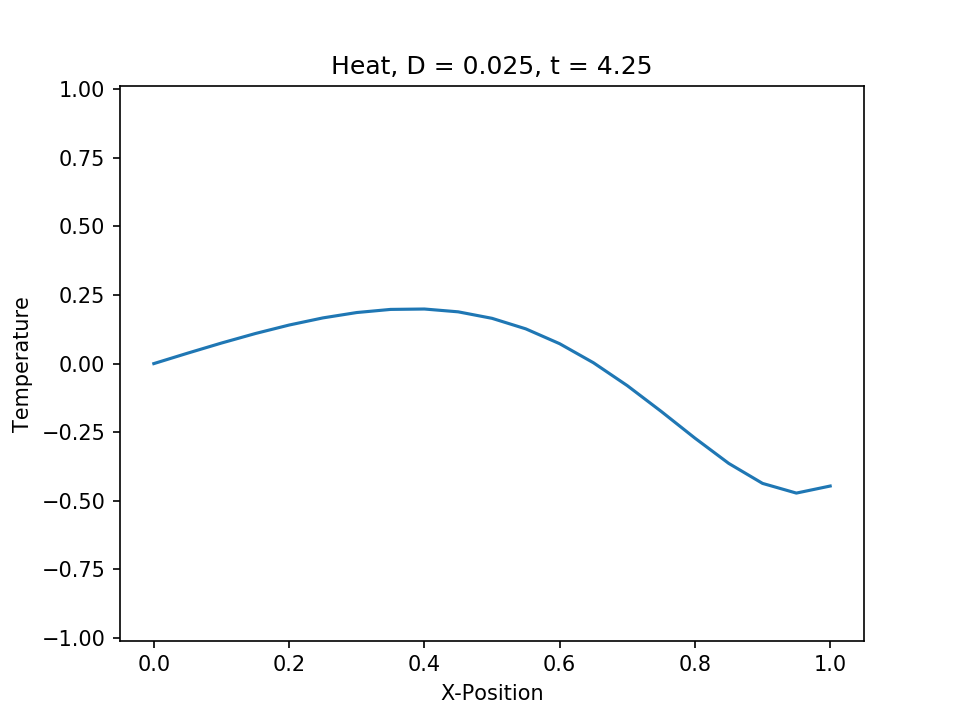

In [9]:
def u(x, t):
    # We will nearest neighbor interpolation
    temp_a = np.abs(a - x)
    min_a = np.min(temp_a)
    x_i = np.where(temp_a == min_a)[0][0]

    temp_b = np.abs(b-t)
    min_b = np.min(temp_b)
    t_i = np.where(temp_b == min_b)[0][0]

    return Grid.Grid[len(Grid.Grid)-t_i-1][x_i]

# Using MatplotLib as visulisation


def dataLD(i, y, line):
    t = i/20
    y = np.array([u(x_i, t) for x_i in x])
    ax.clear()
    ax.set_ylim(-1.01, 1.01)
    ax.set_title('Heat, D = 0.025, t = ' + "{:.2f}".format(t))
    line = ax.plot(x, y)
    ax.set_ylabel('Temperature')
    ax.set_xlabel('X-Position')
    #fig.colorbar(line, shrink=0.5, aspect=5)
    return line,


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Heat, D = 0.025, t = 0.00')

x = np.linspace(0, 1, 21)
y = np.array([u(x_i, 0) for x_i in x])
line = ax.plot(x, y)
ax.set_ylim(-1.01, 1.01)
ax.set_ylabel('Temperature')
ax.set_xlabel('X-Position')

#fig.colorbar(line, shrink=0.5, aspect=10)
ani = animation.FuncAnimation(fig, dataLD, fargs=(
    y, line), frames=np.arange(0, 250), interval=40, blit=True)

plt.show()

In [20]:
#ani.save('animation.gif', writer=animation.PillowWriter(fps=16))

##### Difference between analytic solution and numerical solution

### Example 2D Wave Equation

We want to solve, (Vibrations of square drum skin with air resistance ($\alpha < \pi c$))
> \begin{align*}
  PDE \text{  } & u_{tt} +2 \alpha u_t= c^2u_{xx} + c^2u_{yy}, 0<x<1, 0<y<1, 0<t<\inf\\
\ BC \text{  }&  u(0,y,t)=u(1,y,t)=0\\
\ BC \text{  }& u(x,0,t)=u(x,1,t)=0\\
\ IC \text{  }& u_t(x,y,0) = 0\\
\ IC \text{  }& u(x,y,0) = xy
\end{align*}


Analytic Solution is derived in Q1 of the PDF "APDE2 Math Cafe Questions Week6.pdf"

We have the analytic solution is, ($n=(n_x,n_y)$)
> $u(x,y,t)= \sum^{\infty}_{n=1} \frac{4(-1)^{n_x+n_y}}{\pi^2n_xn_y}sin(\pi n_xx)sin(n_y \pi y)e^{-\alpha t}
(Cos(Q_nt)+ \frac{\alpha}{Q_n}sin(Q_nt))$

Where
> $Q_n = \sqrt{\pi^2c^2(n_x^2+n_y^2) - \alpha^2}$

We will use discretization on the PDE

Using the key 
> N,S = +1dy,-1dy in the y direction

> E,W = +1dx,-1dx in the x direction

> U,D = +1dt,-1dt in the t direction

For $u_{tt}$ we will use the difference formula (should not have a factor of a half)
>$u_{tt} = \frac{1}{2(dt)^2}(u_U-2u_O+u_D)$

This leads us to 

> $u_U = \frac{2dt}{1+4\alpha dt}\left( \frac{1}{2dt}(2u_O - u_D) + 2 \alpha u_O + dtD \right)$

Where $D$ is

> $D = \frac{c^2}{2(dx)^2}(u_E-2u_O+u_W) + \frac{c^2}{2(dy)^2}(u_N-2u_O+u_S)$


Also, by using the IC's we have the first two grids in time are the same
> \begin{align*}
 u(x,y,0+dt) &=u(x,y,0)+(dt) u_t(x,y,0) \\
\ u(x,y,dt) &= u(x,y,0)\\
\ u(x,y,dt) &= xy\\
\end{align*}

In [5]:
dx = 0.05
dy = 0.05
dt = 0.001

t_f = 5.0
alpha = 0.4
c = 1


Num_x = int(1/dx) + 1
Num_y = int(1/dy) + 1
Num_t = int(t_f/dt) + 1



Grid = np.zeros([Num_t, Num_y, Num_x])



def u_(x, y, t):
    '''Where x,y,t are there int positions'''
    return Grid[t][-(y+1)][x]


def set_u_(x, y, t, val):
    Grid[t][-(y+1)][x] = val


def IC(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)
    
# BC's are zero, so they are already set

# IC's
Grid[0] = np.array([[IC(x,y) for x in np.linspace(0, 1, num=Num_x, endpoint=True)]
                    for y in np.linspace(1, 0, num=Num_y, endpoint=True)])
Grid[0][0,:] = 0
Grid[0][:,-1] = 0
Grid[1] = Grid[0] #Starts from rest


def solve_u(x,y,t):
    '''x,y,t are the discrte positions'''
    t -= 1 #To make one below origin
    
    D = (u_(x+1,y,t)-2*u_(x,y,t)+u_(x-1,y,t))/(dx)**2 + (u_(x,y+1,t)-2*u_(x,y,t)+u_(x,y-1,t))/(dy)**2
    D *= (c**2)/(2)
    
    u_up = 1/(2*dt)*(2*u_(x,y,t)-u_(x,y,t-1))+2*alpha*u_(x,y,t) + dt*D
    u_up *= (2*dt)/(1+4*alpha*dt)
    
    set_u_(x,y,t+1, u_up)
    

#Not first 2 as they have been set by IC
for t in range(2, Num_t):
    #Not on the boundaries
    for x in range(1,Num_x-1):
        for y in range(1, Num_y-1):
            solve_u(x,y,t)
            
    
    



In [7]:
a = np.linspace(0, 1, num=int(Num_x), endpoint=True)
b = np.linspace(1, 0, num=int(Num_y), endpoint=True)
U, V = np.meshgrid(a, b)
X = U
Y = V


ipv.figure()
s = ipv.plot_surface(X, Y, Grid[::25], color="orange")
#w = ipv.plot_wireframe(X, Y, Grid, color="red")
ipv.animation_control(s, add = True, interval=200)
#mylink = widgets.link((s, 'sequence_index'), (w, 'sequence_index'))
ipv.show()

#### Compare to Analytic Solution

In [7]:
c = 1
alpha = 0.001#0.4
x_0 = 0.5
y_0 = 0.5

def Q(n_x,n_y):
    return (c**2*np.pi**2*(n_x**2+n_y**2)-alpha**2)**0.5

def Beta(n_x, n_y):
    temp = 4*alpha*(-1)**(n_x+n_y)
    temp = temp/(np.pi**2*n_x*n_y*Q(n_x,n_y))
    return temp
    
def u(x,y,t):
    my_sum = 0
    upper = 10
    for n_x in range(1, upper):
        for n_y in range(1, upper):
            temp = Beta(n_x,n_y)*np.sin(np.pi*n_x*x)*np.sin(np.pi*n_y*y)
            temp *= np.e**(-alpha*t)*((Q(n_x,n_y)/alpha)*np.cos(Q(n_x,n_y)*t)+np.sin(Q(n_x,n_y)*t))
            my_sum += temp
    return my_sum

In [104]:
a = np.linspace(0, 1, num=int(Num_x), endpoint=True)
b = np.linspace(1, 0, num=int(Num_y), endpoint=True)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
#Z = np.array([[np.real(u(x,y)) for x in a] for y in b])
Z = np.array([[[u(x,y,t) for x in a] for y in b] for t in np.linspace(0,5,10)])

ipv.figure()
s = ipv.plot_surface(X, Y, Z, color="orange")
#w = ipv.plot_wireframe(X, Y, Z, color="red")
ipv.animation_control(s, add = True, interval=200)
#mylink = widgets.link((s, 'sequence_index'), (w, 'sequence_index'))
ipv.show()

In [126]:
t_step = 50
np.max(abs(Grid[t_step]-np.array([[u(x,y,dt*t_step) for x in np.linspace(0, 1, num=Num_x, endpoint=True)]
                    for y in np.linspace(1, 0, num=Num_y, endpoint=True)])))

0.2502495497913257

#### Compute On GPU (CUDA)

nvcc PDE_Solver.cu -o PDESolve

./PDESolve > output

In [4]:
name = "Cuda_Training/output"
xDim = 101
yDim = 101

def read_file(filename):
    f = open(filename,"r")
    return np.array(f.read().splitlines()).astype(float)

        

x = np.linspace(0.0,1.0,xDim)
y = np.linspace(0.0,1.0,yDim)

U, V = np.meshgrid(x, y)
X = U
Y = V  # The y-axis is the wrong way around
Z = read_file(name)

''' For single Z
ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()
'''
#
ipv.figure()
s = ipv.plot_surface(X, Y, Z.reshape(len(Z)//(xDim*yDim),1,-1), color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.animation_control(s, add = True, interval=200)#, sequence_length=2)
ipv.show()

## Coupled Time Dependence

Method 1
Have a small time step compared to $x$ step (with the option of inner iteration)

Method 2
Do each grid for whole time while others frozen, then repeat until there is convergence

Method 3
Use forward and backward equations for time, backward equations while waiting for convergence, then forward equation to get next time step.

### Example Coupled Time Dependence (Heat)
> \begin{align*}
  PDE \text{  } & u_{t} = Du_{xx} + \alpha g, 0<x<1, 0<t<\inf\\
\ BC \text{  }&  u(0,t)=0\\
\ BC \text{  }& u(1,t)=cos(t)\\
\ IC \text{  }& u(x,0) = x
\end{align*}

> \begin{align*}
  PDE \text{  } & g_{t} = Dg_{xx} + \beta u, 0<x<1, 0<t<\inf\\
\ BC \text{  }&  g(0,t)=0\\
\ BC \text{  }& g(1,t)= 1\\
\ IC \text{  }& g(x,0) = 0
\end{align*}

#### Method 1
> \begin{align*}
\ g_N &= g_O + \frac{\delta t D}{h^2}(g_E-2g_O+g_W) + \delta t \beta u_O \\
\ u_N &= u_O + \frac{\delta t D}{h^2}(u_E-2u_O+u_W) + \delta t \alpha g_O \\
\end{align*}

With $\frac{\delta t}{h^2}<0.5$

In [31]:
h = 0.05
dt = 0.0005
beta = -1
alpha = 1
D=0.025


Num_x = int(1/h) + 1
t_f = 5
Num_t = int(t_f/dt) + 1
Grid_g = np.zeros([Num_t, Num_x])
Grid_u = np.zeros([Num_t, Num_x])

#IC's
x_bound = np.array([i*h for i in range(0, Num_x)]) 
#Grid_g[-1] = #is zero 
Grid_u[-1] = x_bound


#BC's
cos_bound = np.array([np.cos(j*dt) for j in range(Num_t-1, 0-1, -1)]) 

Grid_g[:, len(Grid_g[0])-1] = np.ones([Num_t])
Grid_u[:, len(Grid_u[0])-1] = cos_bound

Grid_g = GridS(Grid_g)
Grid_u = GridS(Grid_u)

u_ = Grid_u.u_
g_ = Grid_g.u_


def new_g_(i,j):
    j -= 1
    temp = g_(i+1,j) - 2*g_(i,j) + g_(i-1,j)
    temp *= (dt*D)/(h**2)
    temp += g_(i,j) + dt*beta*u_(i,j)
    return temp

def new_u_(i,j):
    j -= 1
    temp = u_(i+1,j) - 2*u_(i,j) + u_(i-1,j)
    temp *= (dt*D)/(h**2)
    temp += u_(i,j) + dt*alpha*g_(i,j)
    return temp


def solve_g(j):
    for i in range(1,Num_x-1):
        Grid_g.Set_u_(i,j,new_g_(i,j))

def solve_u(j):
    for i in range(1,Num_x-1):
        Grid_u.Set_u_(i,j,new_u_(i,j))

   
for j in range(1, Num_t):
    #Repeat this untill no change, but that is what small t is for
    solve_g(j)
    solve_u(j)


'''
for j in range(1, Num_t):
    counter = 0
    diff = 1.1
    while diff > 0.006:
        old_g_grid = Grid_g.Grid[-(j+1)].copy()
        old_u_grid = Grid_u.Grid[-(j+1)].copy()

        solve_g(j)
        solve_u(j)
        
        diff1 = np.max(np.abs(old_g_grid - Grid_g.Grid[-j]))
        diff2 = np.max(np.abs(old_u_grid - Grid_u.Grid[-j]))
        
        diff = max(diff1,diff2)
        print(diff)
        counter += 1
    
    #print (counter) #21.7s not worth it, just have smaller t
'''
print("")    

In [32]:
a = np.arange(0.0, 1.0+0.00001, h)
b = np.arange(0.0, t_f+0.00001, dt)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = Grid_u.Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

In [136]:
a = np.arange(0.0, 1.0+0.00001, h)
b = np.arange(0.0, t_f+0.00001, dt)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = Grid_g.Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

#### Analytic Solution

We have a brief description of the derivation here, but for the full written solution check the PDF "Example Analytic Solution Of PDE Coupled Time Dependence(Parobolic).pdf"

We do substitution $u=v+w$, $g=q+p$. By setting BC's of $w,p$ to be $0$. This leads to $v(x,t)= xcos(t)$ and $p(x,t)=x$ 

> \begin{align*}
  PDE \text{  } & w_{t} = Dw_{xx} + \alpha p + x(\alpha + sin(t)), 0<x<1, 0<t<\inf\\
\ BC \text{  }&  w(0,t)=0\\
\ BC \text{  }& w(1,t)=0\\
\ IC \text{  }& w(x,0) = 0
\end{align*}

> \begin{align*}
  PDE \text{  } & p_{t} = Dp_{xx} + \beta w + \beta xcos(t), 0<x<1, 0<t<\inf\\
\ BC \text{  }&  p(0,t)=0\\
\ BC \text{  }& p(1,t)= 0\\
\ IC \text{  }& p(x,0) = -x
\end{align*}

With 
> \begin{align*}
  u(x,t) &= xcos(t) + w(x,t)\\
\ g(x,t) &= x + p(x,t)
\end{align*}

Then we use an Eigen Function expansion method. (Express all $x$ terms as a sequence of $sin(n\pi x)$, as fits our BC's)

We note
>$$
x = \sum_{n=1}^\infty \zeta_n sin(n\pi x) \text{,    } \zeta_n = -\frac{2(-1)^n}{n\pi} 
$$

And $\gamma_n = n^2\pi^2$

> \begin{align*}
w(x,t) &= \sum_{n=1}^\infty w_n(t)sin(n\pi x)\text{,    } &p(x,t) = \sum_{n=1}^\infty p_n(t)sin(n\pi x)\\
w_{t}(x,t) &= \sum_{n=1}^\infty \dot{w}_n(t)sin(n\pi x)\text{,    } &p_{t}(x,t) = \sum_{n=1}^\infty \dot{p}_n(t)sin(n\pi x)\\
w_{xx}(x,t) &= -\sum_{n=1}^\infty \gamma_n w_n(t)sin(n\pi x)\text{,    } &p_{xx}(x,t) = -\sum_{n=1}^\infty \gamma_n p_n(t)sin(n\pi x)\\
(\alpha +sin(t))x &= \sum_{n=1}^\infty f_n(t)sin(n\pi x)\text{,    } &\beta xcos(t) = \sum_{n=1}^\infty h_n(t)sin(n\pi x)
\end{align*}

With 
> \begin{align*}
f_n(t) &= (\alpha +sin(t))\zeta_n \\
h_n(t) &=\beta cos(t) \zeta_n
\end{align*}

We get equations
> \begin{align*}
\sum_{n=1}^\infty [ \dot{w}_n(t) + D\gamma_n w_n(t) - \alpha p_n(t) - f_n(t)] sin(n\pi x) &= 0\\
\sum_{n=1}^\infty [ \dot{p}_n(t) + D\gamma_n p_n(t) - \beta w_n(t) - h_n(t)] sin(n\pi x) &= 0
\end{align*}

Thus we get the coupled ODE system
> \begin{align*}
PDE \text{  }\dot{w}_n(t) + D\gamma_n w_n(t) - \alpha p_n(t)&= (\alpha + sin(t))\zeta_n\\
PDE \text{  }\dot{p}_n(t) + D\gamma_n p_n(t) - \beta w_n(t)&= \beta cos(t) \zeta_n\\
\end{align*}

With $p_n(0) = -\zeta_n$ and $w_n(0) = 0$


In [8]:
# Check coupled ODE system (Used as proof not the most efficient method,
# used to quickly see if current equations are correct)
def zeta_(n):
    return -(2*(-1)**n)/(n*np.pi)


h = 0.05
dt = 0.0005
N = 20
beta = -1
alpha = 1
D=0.025
t_f = 5
x_f = 1
Num_t = int(t_f/dt) + 1
p_n = np.zeros([N,Num_t]) # First row full of zeros
w_n = np.zeros([N,Num_t])

#Need IC's
#w stays zero
p_n[1:,0] = -np.array([zeta_(n) for n in range(1,N)])

def G_(n):
    return n**2*np.pi**2

    
    
    
def dot_w_(n,t_step):
    t = t_step*dt
    temp = (alpha + np.sin(t))*zeta_(n) - D*G_(n)*w_n[n][t_step] + alpha*p_n[n][t_step]
    return temp
    
def dot_p_(n,t_step):
    t = t_step*dt
    temp = beta*np.cos(t)*zeta_(n) - D*G_(n)*p_n[n][t_step] + beta*w_n[n][t_step]
    return temp


def solve():
    
    #Dont need p_0 and start at time step 1 as got IC's at 0
    for n in range(1,N):
        # Do line of p_n
        for t_step in range(1,Num_t):
            p_n[n][t_step] = p_n[n][t_step-1] + dot_p_(n,t_step-1)*dt
            w_n[n][t_step] = w_n[n][t_step-1] + dot_w_(n,t_step-1)*dt
    print("Solved")



In [9]:
solve()
def u(x,t):
    temp = x*np.cos(t)
    t_step = int(t//dt)
    
    for n in range(1,N):
        temp += w_n[n][t_step]*np.sin(n*np.pi*x)
        
    return temp

def g(x,t):
    temp = x
    t_step = int(t//dt)
    
    for n in range(1,N):
        temp += p_n[n][t_step]*np.sin(n*np.pi*x)
        
    return temp

Solved


In [10]:
a = np.linspace(0, x_f, num=int(Num_x), endpoint=True)
b = np.linspace(0, t_f, num=int(Num_t//100), endpoint=True)

U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = np.array([[np.real(u(x,b[-b_i])) for x in a] for b_i in range(1,len(b)+1)])

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

In [11]:
#Check how similar
at_t = 3.0
stat1 = Grid_u.Grid[-(int(at_t/dt)+1)]
stat2 = np.array([np.real(u(i*h,at_t)) for i in range(len(Grid_u.Grid[0]))])
#print(stat1)
#print(stat2)
stat1-stat2

NameError: name 'Grid_u' is not defined

This shows us we have made no mistakes in our analytic solution so far.


To solve this system of coupled ODE's we will change $\frac{d}{dt}$ to $\L$ and treat as a simultaneous equation.

> \begin{align*}
(\L + D \gamma_n)w_n(t) - \alpha p_n(t) &= (\alpha + sin(t))\zeta_n\\
(\L + D \gamma_n)p_n(t) - \beta w_n(t) &= \beta cos(t)\zeta_n\\
\end{align*}


> $\dot{\dot{w}}_n(t) + K_n \dot{w}_n + Q_nw_n = q_n$

With,
> \begin{align*}
q_n &=\dot{f}_n + D \gamma_n f_n + \alpha h_n\\
&= \zeta_n[cos(t)(1+\alpha \beta)+D \gamma_n sin(t) + D \gamma_n \alpha]\\
Q_n &= D^2\gamma_n^2-\alpha \beta\\
K_n &= 2D\gamma_n
\end{align*}

We get for $w_n(t)$ and $p_n(t)$,
> \begin{align*}
w_n(t) &= Ae^{m_{n,+}t} + Be^{m_{n,-}t} + C_1 cos(t) + C_2 sin(t) + C_3\\
p_n(t) &= A\sqrt{\frac{\beta}{\alpha}}e^{m_{n,+}t} - B\sqrt{\frac{\beta}{\alpha}}e^{m_{n,-}t} + \frac{sin(t)}{\alpha}(D\gamma_n C_2 - C_1 - \zeta_n)\\
&+ \frac{cos(t)}{\alpha}(C_2 + D\gamma_n C_1) + \frac{D\gamma_nC_3}{\alpha} - \zeta_n
\end{align*}


With,

>\begin{align*}
C_1 &= \zeta_n\frac{(1+\alpha \beta)(Q_n - 1) - k_nD\gamma_n}{k_n^2 + (Q_n -1)^2}\\
C_2 &= \zeta_n\frac{k_n(1+\alpha\beta)+ (Q_n - 1)D\gamma_n}{k_n^2+(Q_n-1)^2}\\
C_3 &= \zeta_n\frac{D\gamma_n\alpha}{Q_n}
\end{align*}

For these IC's

>\begin{align*}
A &= -\frac{1}{2} \left( \frac{1}{\sqrt{\alpha \beta}}(C_2 + D\gamma_n(C_1 + C_3)) + C_1 + C_3 \right)\\
B &= \frac{1}{2} \left( \frac{1}{\sqrt{\alpha \beta}}(C_2 + D\gamma_n(C_1 + C_3)) - C_1 -C_3 \right)
\end{align*}

Full derivation of analytic solution in PDF

In [5]:
h = 0.05
dt = 0.0005
beta = -1
alpha = 1
D=0.025
t_f = 5
x_f = 1

Num_t = int(t_f/dt) + 1
Num_x = int(x_f/h) + 1


def G_(n):
    return n**2*np.pi**2

def zeta_(n):
    return 2*(-1)**(n+1)/(n*np.pi)

def Q_(n):
    return D**2*G_(n)**2-alpha*beta
    
def k_(n):
    return 2*D*G_(n)

def C_1(n):
    temp = (1+alpha*beta)*(Q_(n)-1)-D*G_(n)*k_(n) #incorrect minus sign was (1-alpha*beta)
    temp *= zeta_(n)/((Q_(n)-1)**2+k_(n)**2)
    return temp
    
def C_2(n):
    temp = G_(n)*D*(Q_(n)-1)+(1+alpha*beta)*k_(n)
    temp *= zeta_(n)/((Q_(n)-1)**2+k_(n)**2)
    return temp

def C_3(n):
    temp = zeta_(n)*D*G_(n)*alpha
    temp /= Q_(n)
    return temp
    
    
def B_(n):
    temp = C_2(n) + D*G_(n)*(C_1(n) + C_3(n))
    temp /= (alpha*beta)**(0.5)
    temp -= C_1(n) + C_3(n)
    temp /= 2
    return temp
    
def A_(n): #aka A in notes
    temp = C_2(n) + D*G_(n)*(C_1(n) + C_3(n))
    temp /= (alpha*beta)**(0.5)
    temp += C_1(n) + C_3(n)
    temp /= -2
    return temp
    
def m_p(n):
    return -D*G_(n) + (alpha*beta)**0.5

def m_m(n):
    return -D*G_(n) - (alpha*beta)**0.5
    
def w_(n,t):
    temp = A_(n)*np.exp(m_p(n)*t)+B_(n)*np.exp(m_m(n)*t)
    temp += C_1(n)*np.cos(t)
    temp += C_2(n)*np.sin(t)
    temp += C_3(n)
    return temp

def p_(n,t):
    temp = A_(n)*(beta/alpha)**0.5*np.exp(m_p(n)*t)
    temp -= B_(n)*(beta/alpha)**0.5*np.exp(m_m(n)*t)
    temp += (np.sin(t)/alpha)*(D*G_(n)*C_2(n)-C_1(n)-zeta_(n))
    temp += (np.cos(t)/alpha)*(C_2(n) + D*G_(n)*C_1(n))
    temp += (D*G_(n)*C_3(n))/(alpha) - zeta_(n)
    return temp
    
def u(x,t):
    temp = np.cos(t)*x
    
    for n in range(1,25):
        temp += w_(n,t)*np.sin(n*np.pi*x)
        
    return temp

def g(x,t):
    temp = x
    for n in range(1,25):
        temp += p_(n,t)*np.sin(n*np.pi*x)
        
    return temp
    

In [6]:
a = np.linspace(0, x_f, num=int(Num_x), endpoint=True)
b = np.linspace(0, t_f, num=int(Num_t//100), endpoint=True)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
#Z = np.array([[np.real(u(x,y)) for x in a] for y in b])
Z = np.array([[np.real(u(x,b[-b_i])) for x in a] for b_i in range(1,len(b)+1)])

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

In [7]:
#Check how similar
at_t = 3.0
stat1 = Grid_u.Grid[-(int(at_t/dt)+1)]
stat2 = np.array([np.real(u(i*h,at_t)) for i in range(len(Grid_u.Grid[0]))])
#print(stat1)
#print(stat2)
stat1-stat2

NameError: name 'Grid_u' is not defined

In [27]:
u(2*h,3)

(-0.08969115975409793-1.574195797539744e-19j)

In [12]:
u(0.8,10)
# Silly example data
X = np.linspace(0, 1, num=40, endpoint=True)
Y = np.array([u(x,3) for x in X])

# Make the plot
plt.plot(X, Y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 1)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

IndexError: index 19999 is out of bounds for axis 0 with size 10001

### Example Coupled Time Dependence (Wave)